# Analytical

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

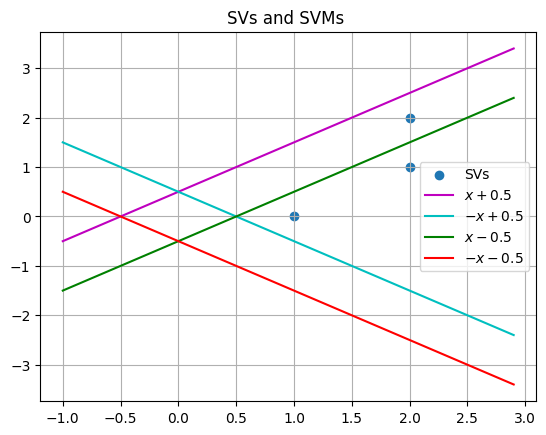

In [2]:
xi = [1,2,2]
yi = [0,1,2]
plt.scatter(xi,yi)
x = np.arange(-1,3,0.1)
y1 = x+0.5
y2 = -x+0.5
y3 = x-0.5
y4 = -x-0.5
plt.plot(x,y1, color='m')
plt.plot(x,y2, color='c')
plt.plot(x,y3, color='g')
plt.plot(x,y4, color='r')
plt.grid('on')
plt.legend(['SVs' ,'$x+0.5$','$-x+0.5$','$x-0.5$','$-x-0.5$'])
plt.title('SVs and SVMs ')
plt.show()


# Implementation

## Visualization


In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data = iris.data[:, :2] #data
label = iris.target #label

In [4]:
sepal_length = iris.data[:,0]
sepal_width = iris.data[:,1]

In [5]:
label
named_label = pd.Series(label)
named_label.replace({0:'setosa', 1:'virginisca',2:'versicolor'}, inplace=True)


<AxesSubplot: >

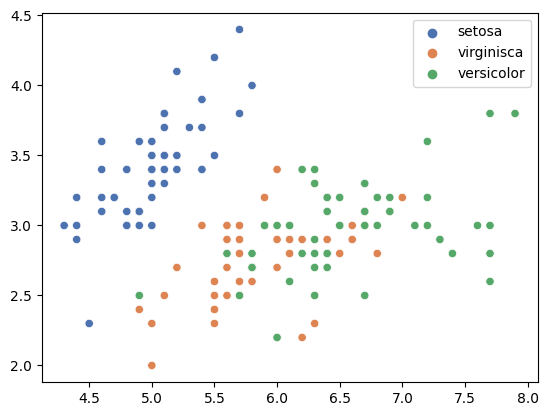

In [6]:
sns.scatterplot(x = sepal_length, y = sepal_width, hue = named_label, palette="deep")

In [7]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
x = iris.data
y = label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
clf_model = LinearSVC()
clf_model.fit(x_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

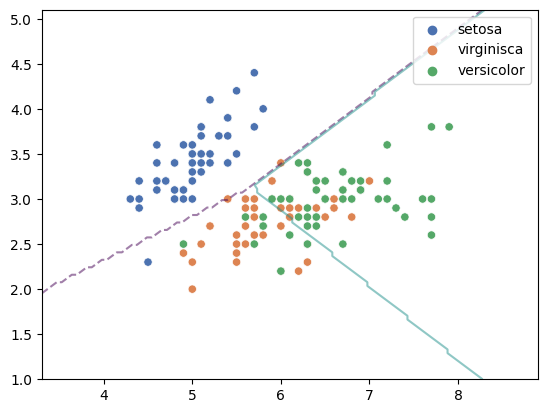

In [22]:
sns.scatterplot(x = sepal_length, y = sepal_width, hue = named_label, palette="deep")
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(

    clf_model,
    x_train,
    plot_method="contour",
    levels=[0,1,2],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)

In [11]:
clf_model = OneVsRestClassifier(LinearSVC()).fit(x_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
predictions = clf_model.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test,predictions)

In [15]:
confusion_matrix

array([[12,  1,  0],
       [ 1,  8,  7],
       [ 0,  4, 12]], dtype=int64)

In [24]:
print(f"model accuracy is: {clf_model.score(x_test,y_test)*100:0.2f}%")

model accuracy is: 71.11%


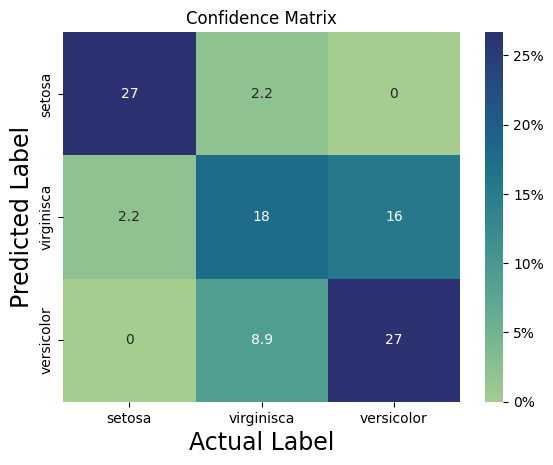

In [29]:
ax = sns.heatmap(confusion_matrix/len(y_test)*100, annot=True, cmap="crest",xticklabels = ['setosa','virginisca', 'versicolor'],
            yticklabels = ['setosa','virginisca', 'versicolor'])
plt.title("Confidence Matrix")
plt.xlabel("Actual Label", fontsize = 17)
plt.ylabel("Predicted Label", fontsize = 17)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,5,10,15,20,25])
cbar.set_ticklabels(["0%","5%","10%","15%","20%","25%"])
plt.show()